In [ ]:
###create data

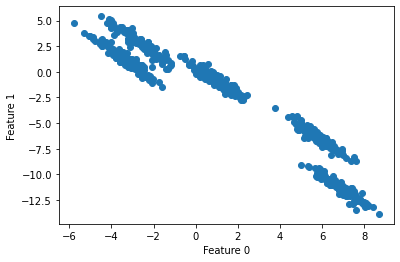

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [ ]:
X

array([[ -2.54959127,   2.5643817 ],
       [  6.91967306,  -7.68498908],
       [  6.59579473, -11.0608146 ],
       ...,
       [ -3.4532048 ,   1.88423434],
       [  6.93461633, -11.69688187],
       [  5.33547104,  -6.01551775]])

Text(0, 0.5, 'Feature 1')

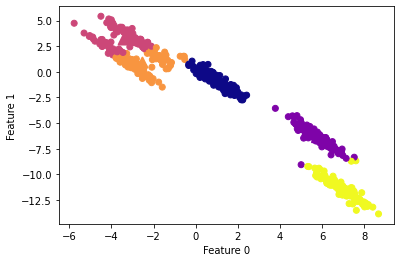

In [ ]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
####3DBSCAN

In [ ]:
###Finding eps and minimum samples

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

In [ ]:
# distances,distances.shape

In [ ]:
# indices

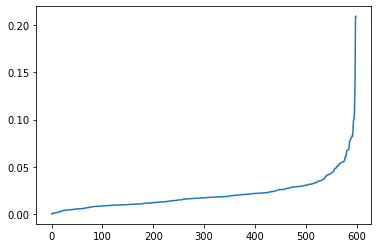

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
min_samples = range(2,5)
eps = np.arange(0.03,0.1, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01

In [ ]:
from sklearn.metrics import silhouette_score
from collections import Counter

In [ ]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X_scaled).labels_
        score = silhouette_score(X_scaled, labels)
        output.append((ms, ep, score))

In [ ]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5487409071517704
min_samples: 4
eps: 0.1


Text(0, 0.5, 'Feature 1')

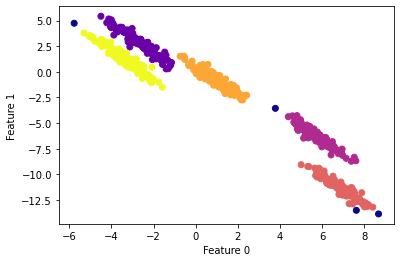

In [ ]:

# cluster the data into five clusters
dbscan = DBSCAN(eps=.1, min_samples = 4)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
labels = DBSCAN(min_samples=min_samples, eps = 0.11).fit(X_scaled).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_scaled, labels)}")

Number of clusters: 6
Number of outliers: 3
Silhouette_score: 0.5509357770160369
